# Lab2-3

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering


In [5]:
economic_data= pd.read_csv('eco_dev_data.csv',skiprows=1)
economic_data.head()

,Country,gnpper,gdpgr,dominv,gdpdfl,agrvlad,indvlad,govcon,exp,resbl,domcrdt,girimp,impcov,intsprd
0,Albania,-0.546057,0.038351,-0.681683,0.033197,2.382044,-0.431603,-0.733548,-1.080820,-1.390221,-0.112488,0.143863,0.414832,0.021542
1,Algeria,-0.309527,-0.147269,0.628847,-0.258008,-0.342724,2.447666,-0.562528,-0.386489,0.692462,-0.143528,0.486408,1.710640,-0.789729
2,Angola,-0.833298,-0.359406,0.137250,6.863520,-0.741471,4.036229,4.055007,1.982403,2.454733,-1.389561,-0.728068,-1.096375,-0.135478
3,Argentina,0.525635,0.727798,-0.478140,-0.372698,-0.807929,0.263393,-0.562528,-1.039977,0.372050,-0.387413,1.046935,0.722543,-0.724304
4,Armenia,-0.632738,-1.393577,-0.329352,1.986510,0.986431,0.263393,-0.562528,-0.672390,-2.191253,-0.919527,-0.074119,0.066092,0.387922


Percentage weightage of PC1: 30.26%
PC1 percentage of variance explained: 0.3026073107939848
PC1 Coefficients: [ 0.45354913  0.18134454  0.19493793 -0.14678333 -0.4557075   0.2333967
  0.16853256  0.28360901  0.2480458   0.41744161  0.05339006  0.06751694
 -0.29612043]
Country ranking based on PC1:
                     Country       PC1
0                 Singapore  5.005766
1                  Malaysia  3.513399
2             HongKongChina  3.501560
3               Switzerland  3.396739
4                   Belgium  3.021757
..                      ...       ...
113  CentralAfricanRepublic -2.728843
114                Tanzania -2.737139
115                  Rwanda -2.811034
116          KyrgyzRepublic -3.317295
117                 Georgia -3.661193

[118 rows x 2 columns]
              PC1       PC2       PC3
gnpper   0.813184  0.215874 -0.305339
gdpgr    0.324659 -0.823768 -0.066680
dominv   0.443761 -0.198755  0.397022
gdpdfl  -0.337316  0.618682  0.336816
agrvlad -0.818072 -0.313366 -

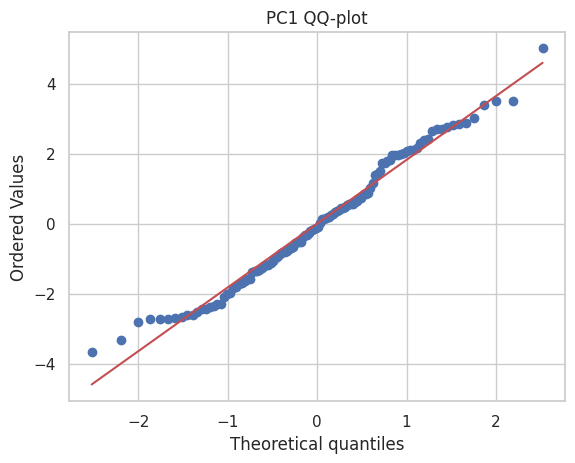

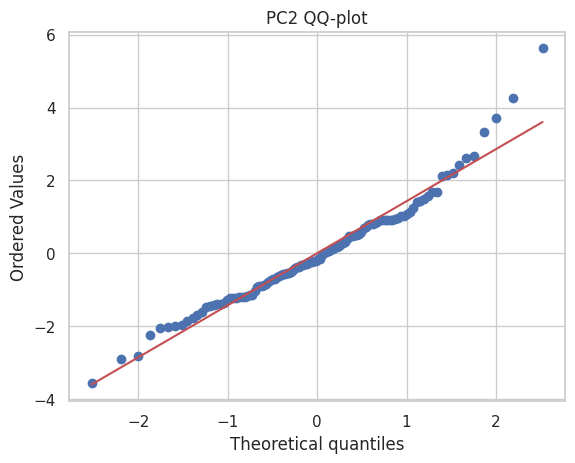

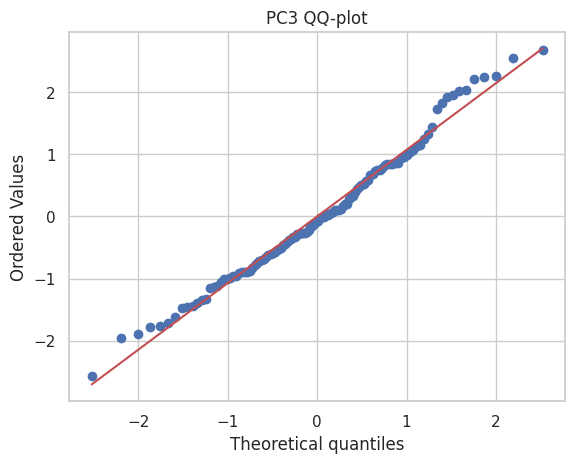

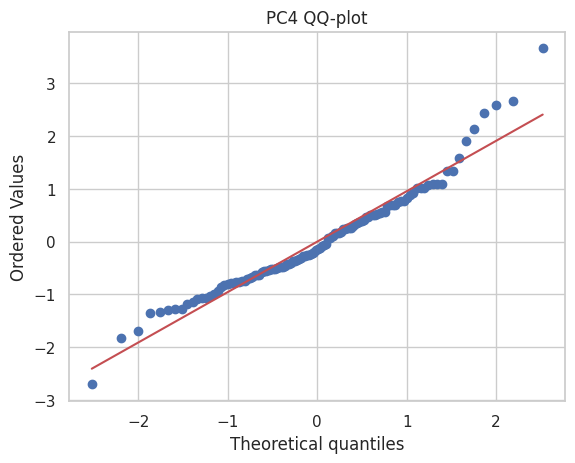

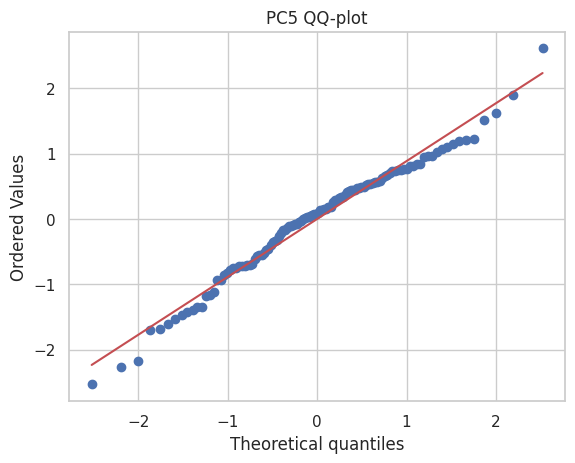

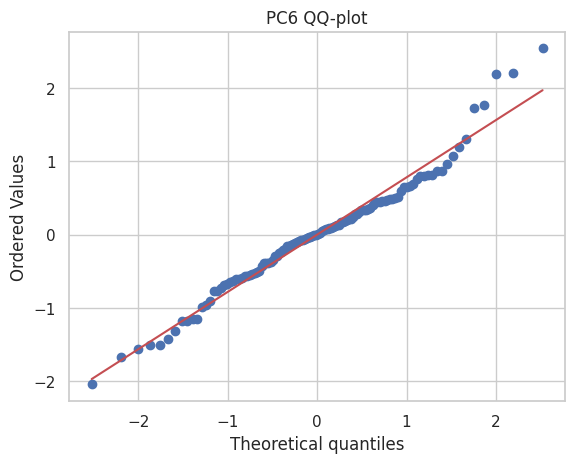

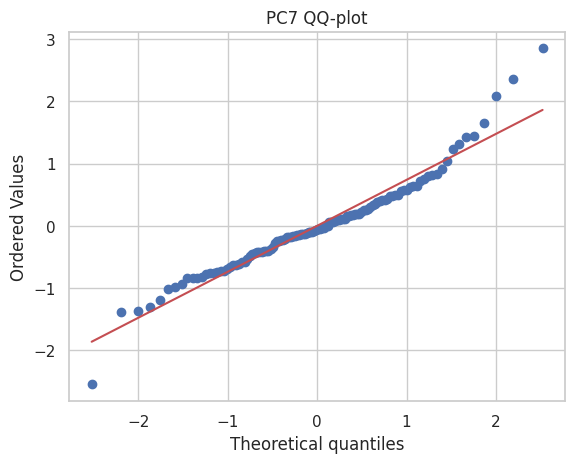

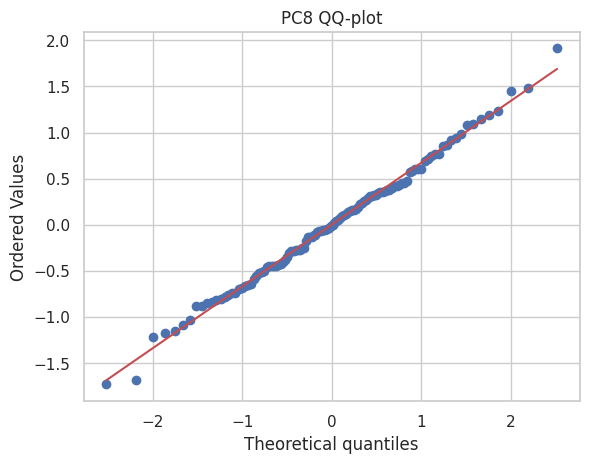

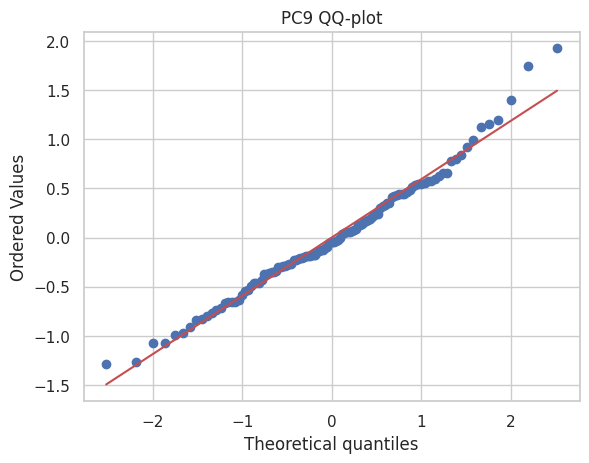

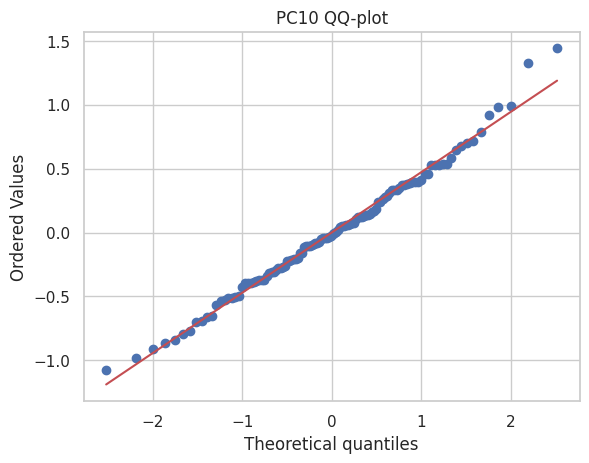

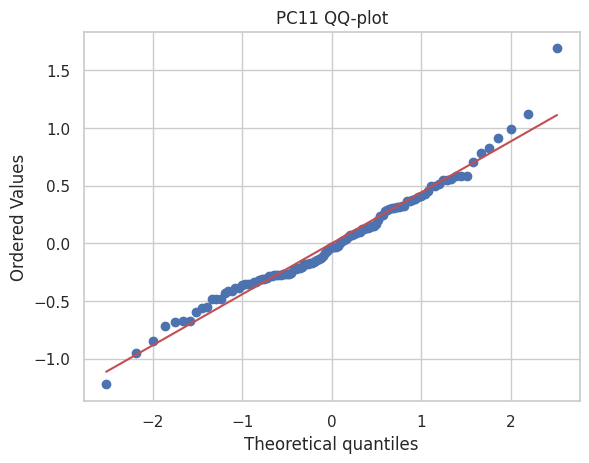

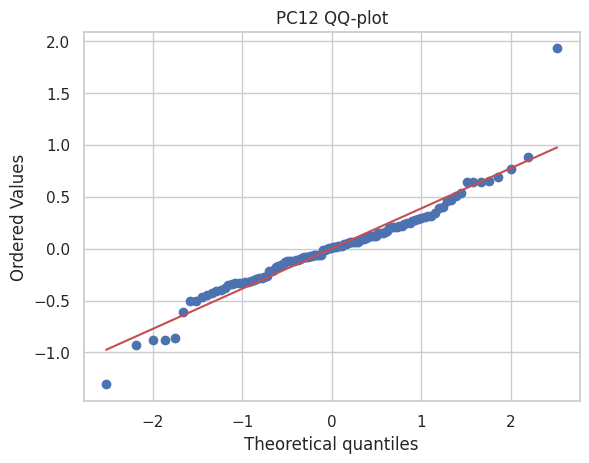

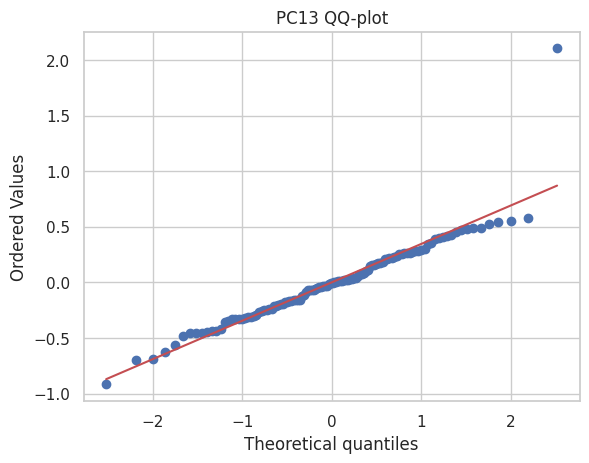

In [15]:

# Separate the features and target variable
y = economic_data['Country']
X = economic_data.drop('Country', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
x_transformed = pca.fit_transform(X_scaled)
x_transformed_df = pd.DataFrame(x_transformed, columns=[f'PC{i+1}' for i in range(x_transformed.shape[1])])
x_transformed_df['Country'] = y
# 3D Scatter plot of first three principal components
fig = px.scatter_3d(x_transformed_df, x='PC1', y='PC2', z='PC3', title="3D Scatterplot of PCA",
                    labels={'PC1': 'PC1', 'PC2': 'PC2', 'PC3': 'PC3'},hover_data= {'Country':True})
fig.show()

# Removing outliers
country_outliers = ["Botswana", "Angola", "Lesotho"]
outlier_idx = y[y.isin(country_outliers)].index
y_removed = y.drop(outlier_idx)
X_removed = np.delete(X_scaled, outlier_idx, axis=0)

# Applying PCA after removing outliers
pca_removed = PCA()
x_transformed_removed = pca_removed.fit_transform(X_removed)
x_transformed_removed_df = pd.DataFrame(x_transformed_removed, columns=[f'PC{i+1}' for i in range(x_transformed_removed.shape[1])])
x_transformed_removed_df['Country'] = y_removed
# 3D Scatter plot after removing outliers
fig = px.scatter_3d(x_transformed_removed_df, x='PC1', y='PC2', z='PC3', title="3D Scatterplot After Removing Outliers",
                    labels={'PC1': 'PC1', 'PC2': 'PC2', 'PC3': 'PC3'}, hover_data= {'Country':True})
fig.show()

# 1 (a) PC1 variance and ranking
explained_variance_ratio = pca_removed.explained_variance_ratio_

# Percentage weightage of PC1
pc1_weightage = explained_variance_ratio[0] * 100
print(f"Percentage weightage of PC1: {pc1_weightage:.2f}%")

pc1_var = pca_removed.explained_variance_[0]
pc1_percent = pc1_var / sum(pca_removed.explained_variance_)
print("PC1 percentage of variance explained:", pc1_percent)

pc1_coefficients = pca_removed.components_[0]
print("PC1 Coefficients:", pc1_coefficients)

# Creating a DataFrame for PC1 scores and ranking
df_pc1 = pd.DataFrame({'Country': y_removed, 'PC1': x_transformed_removed[:, 0]})
df_pc1 = df_pc1.sort_values(by='PC1', ascending=False)
df_pc1 = df_pc1.reset_index(drop=True)
country_ranking = df_pc1['Country'].values
print("Country ranking based on PC1:\n", df_pc1)

# 1 (b) Correlation with principal components
def corr_with_pc(X, pca_x):
    pc1 = np.corrcoef(X, pca_x[:, 0], rowvar=False)[0, 1]
    pc2 = np.corrcoef(X, pca_x[:, 1], rowvar=False)[0, 1]
    pc3 = np.corrcoef(X, pca_x[:, 2], rowvar=False)[0, 1]
    return np.array([pc1, pc2, pc3])

# feature_corr = np.apply_along_axis(corr_with_pc, 1, X_removed, x_transformed_removed)
# feature_corr_df = pd.DataFrame(feature_corr, index=X.columns, columns=['PC1', 'PC2', 'PC3'])

# Ensure X_removed has shape (n_samples, n_features) and x_transformed_removed has (n_samples, n_components)
n_features = X_removed.shape[1]  # Number of features

# Compute correlation feature-wise
feature_corr = np.zeros((n_features, 3))  # Placeholder for correlations with PC1, PC2, and PC3

# Loop over each feature and calculate correlation with PC1, PC2, PC3
for i in range(n_features):
    feature_corr[i, :] = corr_with_pc(X_removed[:, i], x_transformed_removed)

# Convert to DataFrame
feature_corr_df = pd.DataFrame(feature_corr, index=X.columns, columns=['PC1', 'PC2', 'PC3'])

# Display the DataFrame
print(feature_corr_df)

# -------------------------------------------------------------------------------

# 3D Scatter plot of feature correlations
fig = go.Figure(data=[go.Scatter3d(
    x=feature_corr_df['PC1'], y=feature_corr_df['PC2'], z=feature_corr_df['PC3'],
    text=feature_corr_df.index,
    mode='markers',
    marker=dict(
        size=8,
        color=np.arange(len(feature_corr_df.index)),  # Color by feature
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(title="Feature Correlations with Principal Components", scene=dict(
    xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"))
fig.show()

# 1 (c) QQ plots for the principal components

for i in range(x_transformed_removed.shape[1]):
    sns.set(style="whitegrid")

    # Create a QQ plot for each principal component
    stats.probplot(x_transformed_removed[:, i], dist="norm", plot=plt)

    plt.title(f"PC{i+1} QQ-plot")
    plt.grid(True)
    plt.show()



---
---
---
# Lab2

In [ ]:
import pandas as pd
data= pd.read_csv('eco_dev_data.csv',skiprows=1,index_col=0)
data.head()

,gnpper,gdpgr,dominv,gdpdfl,agrvlad,indvlad,govcon,exp,resbl,domcrdt,girimp,impcov,intsprd
Country,,,,,,,,,,,,,
Albania,-0.546057,0.038351,-0.681683,0.033197,2.382044,-0.431603,-0.733548,-1.080820,-1.390221,-0.112488,0.143863,0.414832,0.021542
Algeria,-0.309527,-0.147269,0.628847,-0.258008,-0.342724,2.447666,-0.562528,-0.386489,0.692462,-0.143528,0.486408,1.710640,-0.789729
Angola,-0.833298,-0.359406,0.137250,6.863520,-0.741471,4.036229,4.055007,1.982403,2.454733,-1.389561,-0.728068,-1.096375,-0.135478
Argentina,0.525635,0.727798,-0.478140,-0.372698,-0.807929,0.263393,-0.562528,-1.039977,0.372050,-0.387413,1.046935,0.722543,-0.724304
Armenia,-0.632738,-1.393577,-0.329352,1.986510,0.986431,0.263393,-0.562528,-0.672390,-2.191253,-0.919527,-0.074119,0.066092,0.387922


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data)


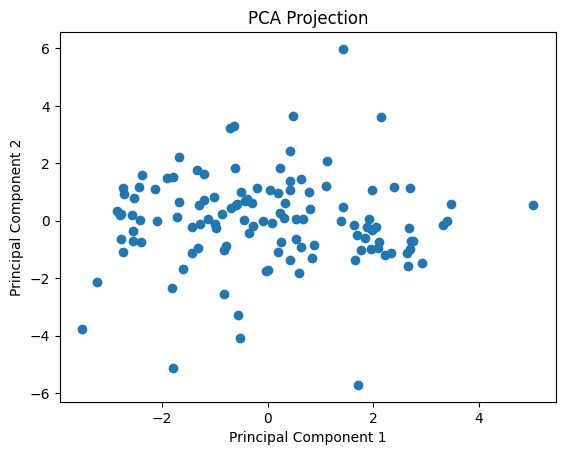

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()


In [ ]:
explained_variance = pca.explained_variance_ratio_


In [ ]:
explained_variance

array([0.24720855, 0.1943125 , 0.14313286, 0.0988668 , 0.07596215,
       0.05577472, 0.04797979, 0.04221606, 0.02870135, 0.02626808,
       0.01683983, 0.01265363, 0.01008368])

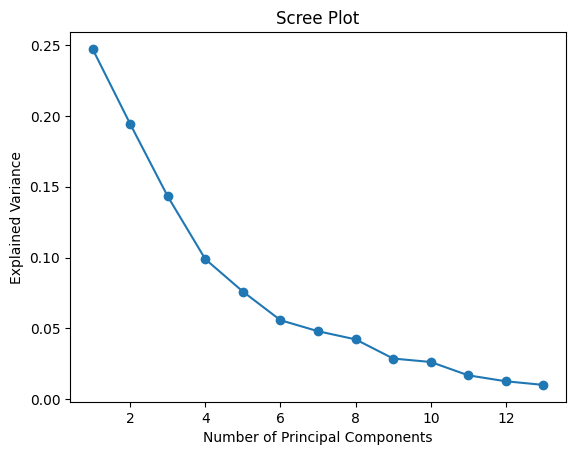

In [ ]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


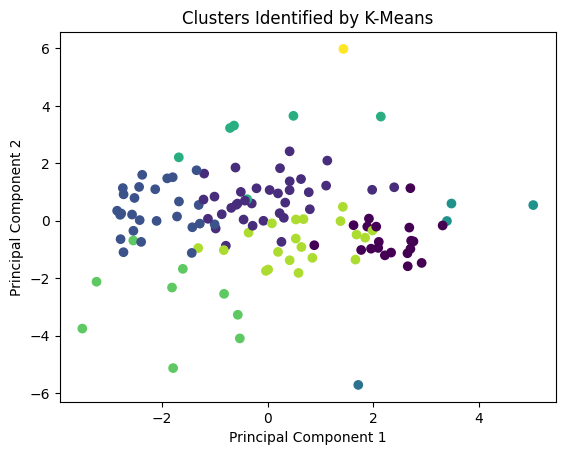

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume 'principal_components' is the result from PCA
# Choose the number of clusters, e.g., 3
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(principal_components)

# Add cluster labels to your DataFrame
data['Cluster'] = clusters

# Visualize the clusters
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Identified by K-Means')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(principal_components, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.18707045604447176


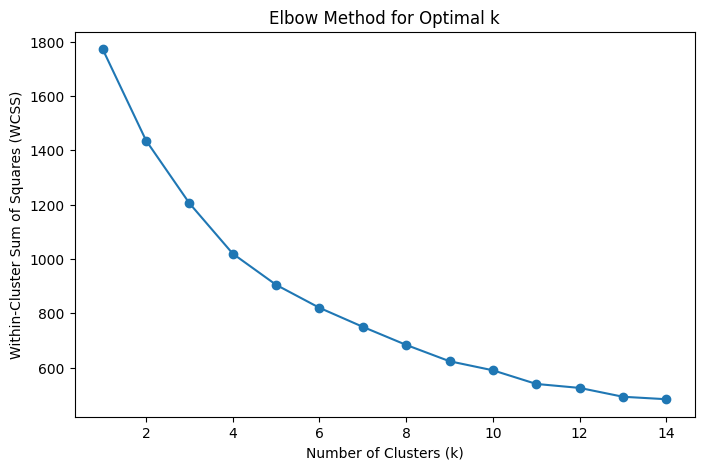

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming `data` contains your dataset (after PCA or as original features)
# data = your data array or DataFrame here

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 15):  # Try k values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


---
---
# Lab4

In [27]:
wine_data = pd.read_csv('Wine_data.csv')
wine_data = wine_data.iloc[:177,:14]
print(wine_data)

    Type  Alcohol  Malic_Acid   Ash  Ash_Alcalinity  Magnesium  Total_Phenols  \
0      B    12.42        2.55  2.27            22.0       90.0           1.68   
1      C    12.60        2.46  2.20            18.5       94.0           1.62   
2      B    12.33        1.10  2.28            16.0      101.0           2.05   
3      C    12.53        5.51  2.64            25.0       96.0           1.79   
4      C    12.45        3.03  2.64            27.0       97.0           1.90   
..   ...      ...         ...   ...             ...        ...            ...   
172    B    11.62        1.99  2.28            18.0       98.0           3.02   
173    A    13.64        3.10  2.56            15.2      116.0           2.70   
174    A    13.88        1.89  2.59            15.0      101.0           3.25   
175    B    11.81        2.12  2.74            21.5      134.0           1.60   
176    B    12.21        1.19  1.75            16.8      151.0           1.85   

     Flavanoids  Nonflavano

In [28]:

# Rename the columns based on the dataset description
wine_data.columns = ['Type', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
                     'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
                     'Proanthocyanins', 'Color_intensity', 'Hue',
                     'OD280/OD315_of_diluted_wines', 'Proline']

# Drop the "Type" column for clustering, but keep it for later validation
X = wine_data.drop('Type', axis=1)
y = wine_data['Type']


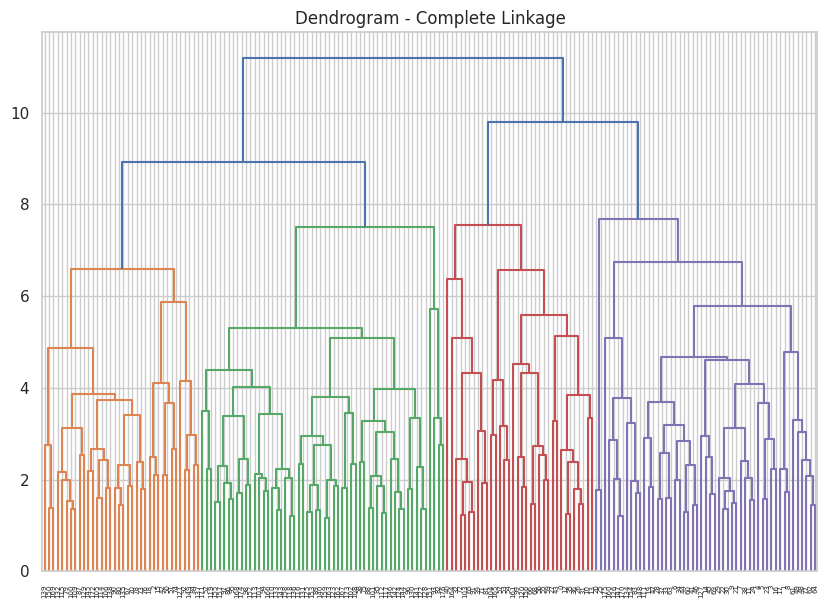

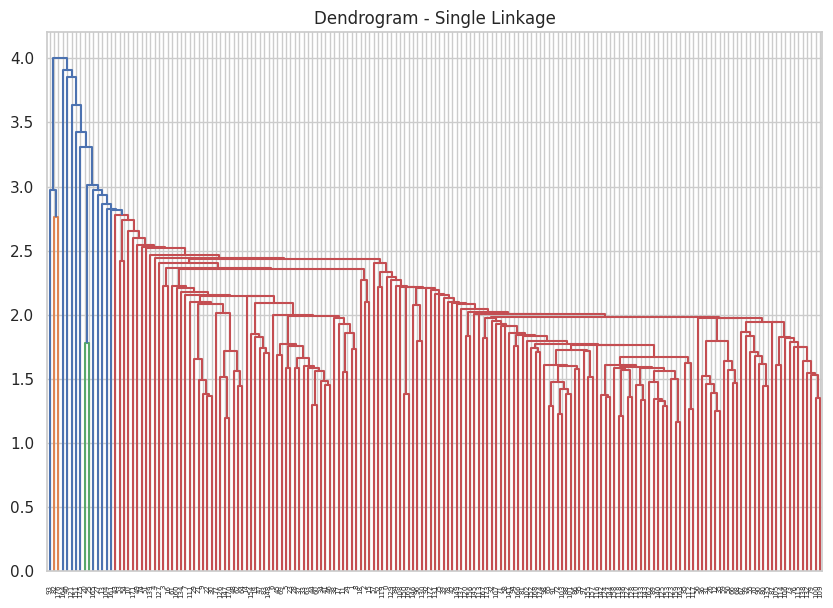

In [29]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot dendrogram for complete linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrogram - Complete Linkage")
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='complete'))
plt.show()

# Plot dendrogram for single linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrogram - Single Linkage")
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='single'))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



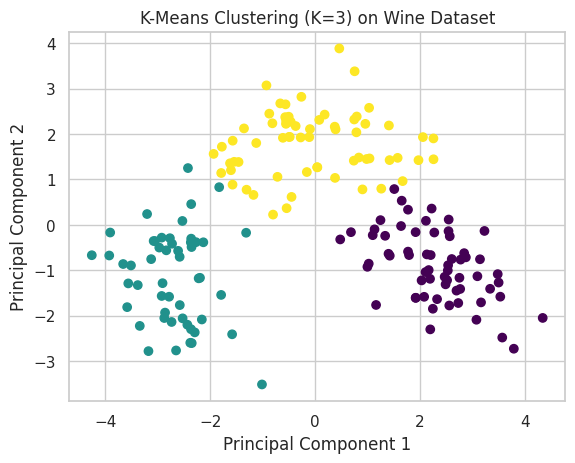

In [32]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data
wine_data['KMeans_Cluster'] = y_kmeans

# Visualize the clusters (only if dimensionality reduction is desired, e.g., using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title("K-Means Clustering (K=3) on Wine Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [34]:
# K-means within-cluster scatter (inertia)
kmeans_inertia = kmeans.inertia_
print("Total within-cluster scatter for K-Means:", kmeans_inertia)


Total within-cluster scatter for K-Means: 1267.3063898125035


In [35]:
from sklearn.metrics import pairwise_distances

# Get cluster labels from hierarchical clustering (using complete linkage as an example)
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_hierarchical = hierarchical.fit_predict(X_scaled)

# Calculate total within-cluster scatter for hierarchical clustering
def within_cluster_scatter(X, labels):
    scatter = 0
    for label in set(labels):
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        scatter += ((cluster_points - centroid) ** 2).sum()
    return scatter

hierarchical_scatter = within_cluster_scatter(X_scaled, y_hierarchical)
print("Total within-cluster scatter for Hierarchical Clustering:", hierarchical_scatter)


Total within-cluster scatter for Hierarchical Clustering: 1556.121831842134


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

label_map = {'A':0,'B':1,'C':2}
actual_labels = y.map(label_map)
# Confusion matrix for K-means clustering vs actual wine types
print("Confusion Matrix - KMeans vs True Type")
print(confusion_matrix(actual_labels, y_kmeans))

# Confusion matrix for Hierarchical clustering vs actual wine types
print("Confusion Matrix - Hierarchical Clustering vs True Type")
print(confusion_matrix(actual_labels, y_hierarchical))

# Calculate accuracy for K-means clustering
kmeans_accuracy = accuracy_score(actual_labels, y_kmeans)
print("Accuracy of K-means clustering:", kmeans_accuracy)

# Calculate accuracy for Hierarchical clustering
hierarchical_accuracy = accuracy_score(actual_labels, y_hierarchical)
print("Accuracy of Hierarchical clustering:", hierarchical_accuracy)


Confusion Matrix - KMeans vs True Type
[[59  0  0]
 [ 3  3 64]
 [ 0 48  0]]
Confusion Matrix - Hierarchical Clustering vs True Type
[[51  0  8]
 [41  3 26]
 [ 0 48  0]]
Accuracy of K-means clustering: 0.3502824858757062
Accuracy of Hierarchical clustering: 0.3050847457627119
